#Program: Early Detection of Cardiovascular Events using Minimal ECG Leads
Author:AATHIRA M S

Dataset:CPSC [China Physiological Signal Challenge 2018]; The training set contains 2000 (female:998; male: 1002) 12 leads ECG recordings lasting from 6 s to just 60 s.ECG recordings were sampled as 500 Hz. All data are provided in MATLAB format.Training Set consists of Normal,Atrial fibrillation (AF),First-degree atrioventricular block (I-AVB),Left bundle branch block (LBBB),Right bundle branch block (RBBB),Premature atrial contraction (PAC),Premature ventricular contraction (PVC),ST-segment depression (STD),ST-segment elevated (STE)

#Import Libraries

In [ ]:
!pip install heartpy
!pip install pyhrv
!pip install mne
!pip install pyhrv
!pip install mat4py
import heartpy as hp
import pandas as pd
import numpy as np
import mne
import pyhrv
from mne.filter import filter_data, resample
from scipy.signal import detrend, find_peaks
import biosppy
import pyhrv.tools as tools
import scipy
from scipy import fftpack
from scipy.signal import butter, freqs, filtfilt
from scipy.misc import electrocardiogram
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from scipy import stats
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from numpy import loadtxt
from xgboost import XGBClassifier
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from numpy import unique
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataloading of single .mat file

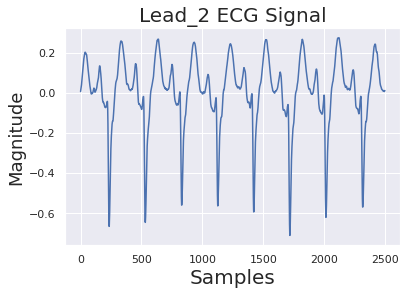

In [ ]:
SAMPLE_RATE = 500 #here sampling rate of the dataset is 500
data_dict = loadmat('/content/drive/MyDrive/ECG-2-Lead DSS/Dataset/A0001.mat') # loadmat will loads all variables stored in the MAT-file into a simple Python data structure
ecg = data_dict['ECG'].flatten() # flatten() returns a copy of the array in one dimensional rather than in 2-D or a multi-dimensional array.
ecg_data = ecg[0][2]
lead_2 = ecg_data[1,:] #the second lead data from 12 lead ecg data is saved to lead_2
lead_2 = np.reshape(lead_2,(-1,1)) #reshaped with -1 rows and 1 column

#===============================Printing=====================================#

plt.plot(lead_2[0:2500]) #plotting of the resultant ecg lead_2 upto 2500 samples
plt.xlabel('Samples', fontsize=20)
plt.xlabel('Samples', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Lead_2 ECG Signal', fontsize=20)
plt.subplots_adjust(hspace=1)
plt.show()

#Finding SNR value

In [ ]:
#inorder find the difference in signal before and filtering SNR value is calculated
def signaltonoise(lead_2, axis=0, ddof=0):
    lead_2 = np.asanyarray(lead_2)
    m = lead_2.mean(axis)
    sd = lead_2.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)
#calculating SNR value after filtering
import numpy as np
def signaltonoisefilter(filtered_ecg_lead_2_p, axis=0, ddof=0):
    filtered_ecg_lead_2_p = np.asanyarray(filtered_ecg_lead_2_p)
    m = filtered_ecg_lead_2_p.mean(axis)
    sdf = filtered_ecg_lead_2_p.std(axis=axis, ddof=ddof)
    return np.where(sdf == 0, 0, m/sdf)

#Filtering

In [ ]:
import numpy as np
def filteration(lead_2,SAMPLE_RATE):
  dataset_lead_2 = np.reshape(lead_2, (-1,1))
  ecg_dataset_lead_2 = dataset_lead_2.flatten()
  try:
    filtered_ecg_lead_2 = hp.filter_signal(ecg_dataset_lead_2, 50, SAMPLE_RATE, filtertype='notch', return_top=False)
    filtered_ecg_lead_2_p = hp.filter_signal(filtered_ecg_lead_2, [0.5, 100], SAMPLE_RATE, filtertype='bandpass', return_top=False)
  except:
    print('not in list')
  plt.plot(filtered_ecg_lead_2_p.flatten()[0:2500])
  plt.xlabel('Samples', fontsize=20)
  plt.ylabel('Magnitude', fontsize=18)
  plt.title('Pure ECG Signal', fontsize=20)
  plt.subplots_adjust(hspace=1)
  plt.show()
  return filtered_ecg_lead_2_p

# Time Domain Feature Extraction

In [ ]:
def to_peakdetection(filtered_ecg_lead_2_p,SAMPLE_RATE):
  m2=[]
  m3=[]
  m4=[]
  m5=[]
  m6=[]
  m7=[]
  m8=[]
  m9=[]
  m10=[]
  m11=[]
  m12=[]
  m1m1=[]
  m2m2=[]
  m3m3=[]
  m4m4=[]
  m5m5=[]
  m6m6=[]
  m7m7=[]
  m8m8=[]
  m9m9=[]
  m10m10=[]
  m11m11=[]
  m12m12=[]

  wd, m = hp.process(hp.scale_data(filtered_ecg_lead_2_p), SAMPLE_RATE) 
  
  plt.figure(figsize=(12,4))
  hp.plotter(wd, m)

  for measure in m.keys():
      print('%s: %f' %(measure, m[measure]))
          
  #plot poincare
  hp.plot_poincare(wd, m)
  m1 = m['bpm']
  m2 = m['ibi']
  m3 = m['sdnn']
  m4 = m['sdsd']
  m5 = m['rmssd']
  m6 = m['pnn20']
  m7 = m['pnn50']
  m8 = m['hr_mad']
  m9 = m['sd1']
  m10 = m['sd2']
  m11 = m['sd1/sd2']
  m12 = m['breathingrate']
  m1m1.append(m1)
  m2m2.append(m2)
  m3m3.append(m3)
  m4m4.append(m4)
  m5m5.append(m5)
  m6m6.append(m6)
  m7m7.append(m7)
  m8m8.append(m8)
  m9m9.append(m9)
  m10m10.append(m10)
  m11m11.append(m11)
  m12m12.append(m12)
  c=pd.concat([pd.DataFrame([m1m1])
              ,pd.DataFrame([m2m2])
              ,pd.DataFrame([m3m3])
               ,pd.DataFrame([m4m4])
               ,pd.DataFrame([m5m5])
               ,pd.DataFrame([m6m6])
               ,pd.DataFrame([m7m7])
               ,pd.DataFrame([m8m8])
               ,pd.DataFrame([m9m9])
               ,pd.DataFrame([m10m10])
               ,pd.DataFrame([m11m11])
               ,pd.DataFrame([m12m12])]
              ,axis=1, keys= ["bpm","ibi","sdnn","sdsd","rmssd","pnn20"
              ,"pnn50","hr_mad","sd1","sd2","s","sd1/sd2","breathingrate"])
  return c

#Peak Detection

In [ ]:
def peak(filtered_ecg_lead_2_p,SAMPLE_RATE):
  peaks, _ = find_peaks(filtered_ecg_lead_2_p, distance = 150, height=00.5) ##peak detection
  plt.plot(filtered_ecg_lead_2_p, 'b-', linewidth=1) #plotting
  plt.plot(peaks, filtered_ecg_lead_2_p[peaks], "*", color="red")
  plt.title('R-Peak detection in ECG signal')
  fig1 = plt.gcf()
  plt.show()
  return peaks

#Frequency Domain Analysis

In [ ]:
def frequency(filtered_ecg_lead_2_p,SAMPLE_RATE):
  

  fs = 500
  
  f1 = []
  f2 = []
  f3 = []
  f4 = []
  f5 = []
  f6 = []
  f7 = []
  f8 = []
    # Compute the PSD and frequency domain parameters using the R-peak series

  result = pyhrv.frequency_domain.welch_psd(rpeaks=peaks)
  peak_VLF = round(result['fft_peak'][0], 2)
  peak_LF = round(result['fft_peak'][1], 2)
  peak_HF = round(result['fft_peak'][2], 2)
  abs_VLF = round(result['fft_abs'][0], 2)
  abs_LF = round(result['fft_abs'][1], 2)
  abs_HF = round(result['fft_abs'][2], 2)
  total_power = round(result['fft_total'], 2)
  LFHFratio = round(result['fft_ratio'], 2)
 
  print("Peak VLF : %s" % str(peak_VLF))
  print("Peak LF: %s" % str(peak_LF))
  print("Peak HF: %s" % str(peak_HF))
  print("ABS VLF : %s" % str(abs_VLF))
  print("ABS LF : %s" % str(abs_LF))
  print("ABS HF : %s" % str(abs_HF))    
  print("Total Power : %s" % str(total_power))
  print("LFHF Ratio : %s" % str(LFHFratio))


  f1.append(peak_VLF)
  f2.append(peak_LF)
  f3.append(peak_HF)
  f4.append(abs_VLF)
  f5.append(abs_LF)
  f6.append(abs_HF)
  f7.append(total_power)
  f8.append(LFHFratio)
# Print the dataframe
  f=pd.concat([pd.DataFrame([f1])
              ,pd.DataFrame([f2])
              ,pd.DataFrame([f3])
              ,pd.DataFrame([f4])
              ,pd.DataFrame([f5])
              ,pd.DataFrame([f6])
              ,pd.DataFrame([f7])
              ,pd.DataFrame([f8])] 
              ,axis=1, keys= ["peak_VLF","peak_LF","peak_HF","abs_VLF","abs_LF","abs_HF","total_power","LFHFratio"])
  print(f)
   
  return f

#Read data of all .mat file

snr value before filtering : [0. 0. 0. ... 0. 0. 0.]


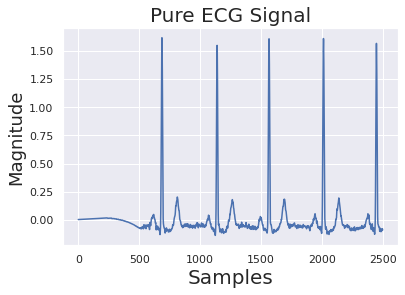

snr value after filtering =  0.0004042000606008279
bpm: 68.254209
ibi: 879.066667
sdnn: 21.389925
sdsd: 16.847455
rmssd: 37.179103
pnn20: 0.785714
pnn50: 0.214286
hr_mad: 16.000000
sd1: 26.282609
sd2: 14.732998
s: 1216.492577
sd1/sd2: 1.783928
breathingrate: 0.379190
         bpm         ibi       sdnn       sdsd      rmssd     pnn20     pnn50  \
           0           0          0          0          0         0         0   
0  68.254209  879.066667  21.389925  16.847455  37.179103  0.785714  0.214286   

  hr_mad        sd1        sd2         s  sd1/sd2  
       0          0          0         0        0  
0   16.0  26.282609  14.732998  1.783928  0.37919  


<Figure size 864x288 with 0 Axes>

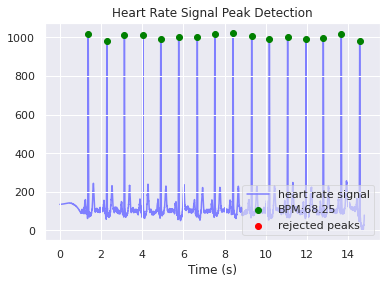

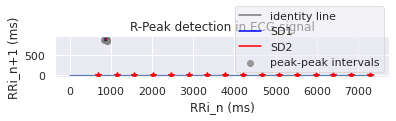

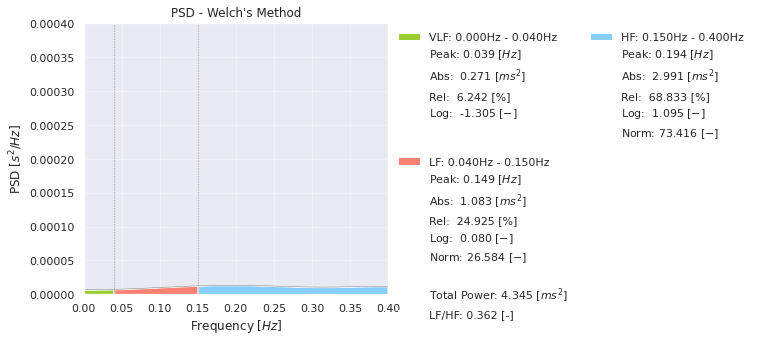

Peak VLF : 0.04
Peak LF: 0.15
Peak HF: 0.19
ABS VLF : 0.27
ABS LF : 1.08
ABS HF : 2.99
Total Power : 4.34
LFHF Ratio : 0.36
  peak_VLF peak_LF peak_HF abs_VLF abs_LF abs_HF total_power LFHFratio
         0       0       0       0      0      0           0         0
0     0.04    0.15    0.19    0.27   1.08   2.99        4.34      0.36
Count =  1
snr value before filtering : [0. 0. 0. ... 0. 0. 0.]


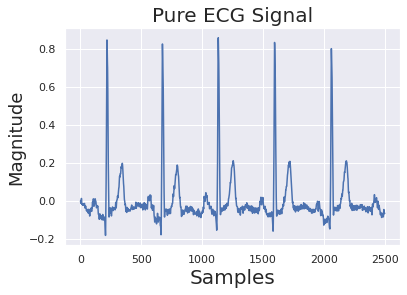

snr value after filtering =  -0.00217036371025748
bpm: 64.289889
ibi: 933.272727
sdnn: 14.277069
sdsd: 12.870120
rmssd: 17.193022
pnn20: 0.200000
pnn50: 0.000000
hr_mad: 12.000000
sd1: 11.917214
sd2: 15.453802
s: 578.575413
sd1/sd2: 0.771151
breathingrate: 0.097409
         bpm         ibi       sdnn      sdsd      rmssd pnn20 pnn50 hr_mad  \
           0           0          0         0          0     0     0      0   
0  64.289889  933.272727  14.277069  12.87012  17.193022   0.2   0.0   12.0   

         sd1        sd2         s   sd1/sd2  
           0          0         0         0  
0  11.917214  15.453802  0.771151  0.097409  


<Figure size 864x288 with 0 Axes>

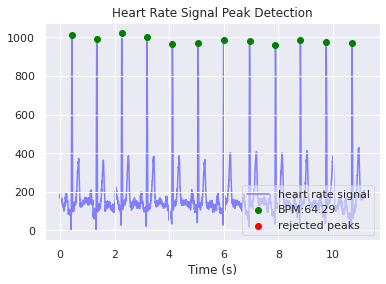

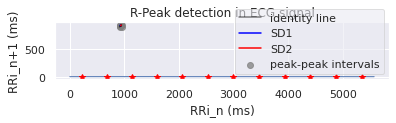

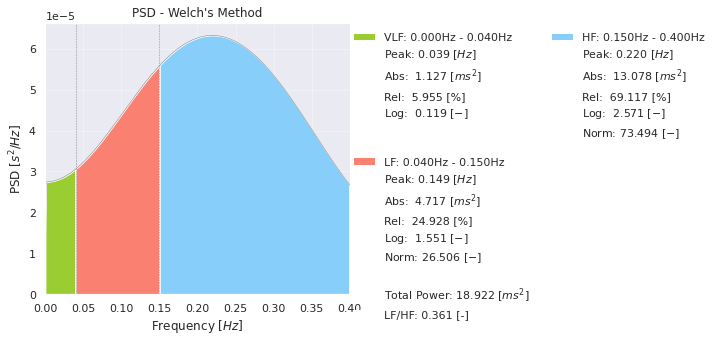

Peak VLF : 0.04
Peak LF: 0.15
Peak HF: 0.22
ABS VLF : 1.13
ABS LF : 4.72
ABS HF : 13.08
Total Power : 18.92
LFHF Ratio : 0.36
  peak_VLF peak_LF peak_HF abs_VLF abs_LF abs_HF total_power LFHFratio
         0       0       0       0      0      0           0         0
0     0.04    0.15    0.22    1.13   4.72  13.08       18.92      0.36
Count =  2


In [ ]:
SAMPLE_RATE = 500 #sample rate is defined
data_dir  = '/content/drive/MyDrive/Machine Learning/Dataset/' # Folder Path
path = '/content/drive/MyDrive/ECG-2-Lead DSS/Dataset/REFERENCE.csv' #Refernce path

dataset = pd.DataFrame()
datasettime = pd.DataFrame()
datasetfreq = pd.DataFrame() #a new dataframe dataset is created
count = 0 #initialising count as 0

ref = pd.read_csv(path) #converting path to dataframe

for file in os.listdir(data_dir):  # iterate through all file
    #print(file)
    if file.endswith(".mat"):   # Check whether file is in text format or not
        data_dict = loadmat(data_dir +file)  #the whole matfile is joined with file
        ecg = data_dict['ECG'].flatten() 
        #print (ecg)
        ecg_data = ecg[0][2]
        #print(ecg_data.shape)
        lead_2 = ecg_data[1,:]

        lead_2 = np.reshape(lead_2, (1,-1))  #reshaping
        lead = pd.DataFrame(lead_2)  #converting lead_2 to dataframe

        #===============================================Stripping=============================================#

        x = file.strip(".mat")    #striping off .mat 
        #print(x)

        #====================================Clubbing of recording,1st label and ecg==========================#

        label = ref.loc[ref['Recording'] == x, 'First_label'] # The .loc[] property explains how to access a group of rows and columns by label(s) or a boolean array.
        #print(label)  
        new = pd.DataFrame({"Recording":x, "First_label":label}) #dataframe is created,finally it contains recording and label joined
        new = new.reset_index() #restting index
        #print(new)
        new_lead = new.join(lead, how='right') #joining lead data to new 
        #print(new)
        dataset = dataset.append(new_lead, ignore_index = True) #new is appended to the dataframe dataset
        #print(dataset)
        #===============================================SNR before filtering==================================#
        sd = signaltonoise(lead_2, axis=0, ddof=0)
        print("snr value before filtering :",sd)
        #=====================================================Filteration======================================#
        
        filtered_ecg_lead_2_p = filteration(lead_2,SAMPLE_RATE )
          
       #==================================================SNR after filtering==============================#
        sdf = signaltonoisefilter(filtered_ecg_lead_2_p, axis=0, ddof=0)
        print("snr value after filtering = ",sdf)

        #====================================================Peak detection=====================================#
        try:
          c =to_peakdetection(filtered_ecg_lead_2_p.flatten(), SAMPLE_RATE)
        except:
          print("error in peak")
          continue
        
        print(c)
        
        #=======================================================Time domain=====================================#  

        new_data = new.join(c, how='right')
        #print(new_data)
        datasettime = datasettime.append(new_data, ignore_index = True) #new is appended to the dataframe dataset
        #print(dataset2)

        #======================================================Peak detection======================================#

        peaks =peak(filtered_ecg_lead_2_p, SAMPLE_RATE)
        #print(peaks)

        #=====================================================Frequency domain======================================#
        try:
          f =frequency(filtered_ecg_lead_2_p, SAMPLE_RATE)
        except:
          print("error in frequency")
          continue
        #print(f) 
        f=pd.DataFrame(f)
        freq_data = new_data.join(f, how='right')
        #print(freq_data)
        datasetfreq = datasetfreq.append(freq_data, ignore_index = True)
    
      #----------------------------------------------------------------------------------------------------------#        
        count += 1 #incrementing count
        print('Count = ', count)
        if count > 1 :  #a limit is setted just for evaluation
          break
#******************************************************CSV FILE *******************************************************************#
#dataset.to_csv("ecg_dataset.csv") #the dataframe is converted to csv file
#datasettime.to_csv("ecg_dataset_timedomain.csv")
#datasetfreq.to_csv("ecg_dataset_timeandfreq.csv")

#EDA ANALYSIS:approach to analyze the data using visual techniques


In [ ]:
eda = pd.read_csv("/content/drive/MyDrive/ECG-2-Lead DSS/Dataset/ecg_dataset_timeandfreq.csv")
# To display the top 5 rows
eda.head(15)
sns.set(color_codes = True)

In [ ]:
eda= eda.drop(['Unnamed: 0','index','Recording'],axis =1) #dropping irrelevant columns
eda.head(15)

,First_label,"('bpm', 0)","('ibi', 0)","('sdnn', 0)","('sdsd', 0)","('rmssd', 0)","('pnn20', 0)","('pnn50', 0)","('hr_mad', 0)","('sd1', 0)",...,"('s', 0)","('sd1/sd2', 0)","('peak_VLF', 0)","('peak_LF', 0)","('peak_HF', 0)","('abs_VLF', 0)","('abs_LF', 0)","('abs_HF', 0)","('total_power', 0)","('LFHFratio', 0)"
0,8.0,68.254209,879.066667,21.389925,16.847455,37.179103,0.785714,0.214286,16.0,26.282609,...,1.783928,0.379190,0.04,0.15,0.19,0.27,1.08,2.99,4.34,0.36
1,3.0,64.289889,933.272727,14.277069,12.870120,17.193022,0.200000,0.000000,12.0,11.917214,...,0.771151,0.097409,0.04,0.15,0.22,1.13,4.72,13.08,18.92,0.36
2,5.0,94.736842,633.333333,13.775986,7.828614,14.624717,0.176471,0.000000,10.0,10.265675,...,0.628489,0.175439,0.04,0.15,0.24,13.62,505.11,2706.96,3225.70,0.19
3,8.0,71.326676,841.200000,12.410748,4.942527,8.569047,0.000000,0.000000,8.0,5.915217,...,0.361020,0.237756,0.04,0.13,0.15,1.08,6.66,9.28,17.02,0.72
4,1.0,77.255871,776.640000,29.305126,13.919411,23.958297,0.375000,0.041667,22.0,16.807736,...,0.451743,0.154512,0.04,0.11,0.30,0.98,17.82,88.68,107.49,0.20
5,2.0,96.618357,621.000000,105.791574,74.196604,151.691996,1.000000,1.000000,82.0,107.240370,...,1.271732,0.230044,0.04,0.15,0.40,3.39,15.68,113.19,132.26,0.14
6,1.0,97.108330,617.866667,21.645220,12.847616,18.792096,0.214286,0.000000,12.0,13.286482,...,0.464922,0.215796,0.04,0.15,0.21,2.69,14.27,40.51,57.47,0.35
7,1.0,58.682895,1022.444444,28.670973,14.380879,29.815117,0.705882,0.000000,21.0,21.066052,...,0.589819,0.217344,0.04,0.15,0.15,494.45,5366.20,13158.63,19019.27,0.41
8,2.0,92.989986,645.230769,100.400853,89.816480,153.922058,0.916667,0.666667,84.0,108.321281,...,1.165127,0.119218,0.04,0.08,0.40,82.84,229.17,646.92,958.93,0.35
9,7.0,90.871879,660.270270,152.623304,181.975676,228.033387,0.548387,0.354839,30.0,160.840107,...,1.657069,0.368400,0.04,0.09,0.29,0.45,6.16,183.15,189.75,0.03


In [ ]:
eda = eda.rename(columns={"('bpm', 0)": "bpm","('ibi', 0)": "ibi","('sdnn', 0)": "sdnn","('sdsd', 0)":"sdsd","('rmssd', 0)":"rmssd","('pnn20', 0)":"pnn20","('pnn50', 0)":"pnn50","('hr_mad', 0)": "hr_mad","('sd1', 0)":"sd1","('sd2', 0)":"sd2","('s', 0)":"s","('sd1/sd2', 0)":"sd1/sd2","('peak_VLF', 0)":"peak_VLF","('peak_LF', 0)":"peak_LF","('peak_HF', 0)":"peak_HF","('abs_VLF', 0)":"abs_VLF","('abs_LF', 0)":"abs_LF","('abs_HF', 0)":"abs_HF","('total_power', 0)":"total_power","('LFHFratio', 0)":"LFHFratio"})
eda.head(15)

,First_label,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,...,s,sd1/sd2,peak_VLF,peak_LF,peak_HF,abs_VLF,abs_LF,abs_HF,total_power,LFHFratio
0,8.0,68.254209,879.066667,21.389925,16.847455,37.179103,0.785714,0.214286,16.0,26.282609,...,1.783928,0.379190,0.04,0.15,0.19,0.27,1.08,2.99,4.34,0.36
1,3.0,64.289889,933.272727,14.277069,12.870120,17.193022,0.200000,0.000000,12.0,11.917214,...,0.771151,0.097409,0.04,0.15,0.22,1.13,4.72,13.08,18.92,0.36
2,5.0,94.736842,633.333333,13.775986,7.828614,14.624717,0.176471,0.000000,10.0,10.265675,...,0.628489,0.175439,0.04,0.15,0.24,13.62,505.11,2706.96,3225.70,0.19
3,8.0,71.326676,841.200000,12.410748,4.942527,8.569047,0.000000,0.000000,8.0,5.915217,...,0.361020,0.237756,0.04,0.13,0.15,1.08,6.66,9.28,17.02,0.72
4,1.0,77.255871,776.640000,29.305126,13.919411,23.958297,0.375000,0.041667,22.0,16.807736,...,0.451743,0.154512,0.04,0.11,0.30,0.98,17.82,88.68,107.49,0.20
5,2.0,96.618357,621.000000,105.791574,74.196604,151.691996,1.000000,1.000000,82.0,107.240370,...,1.271732,0.230044,0.04,0.15,0.40,3.39,15.68,113.19,132.26,0.14
6,1.0,97.108330,617.866667,21.645220,12.847616,18.792096,0.214286,0.000000,12.0,13.286482,...,0.464922,0.215796,0.04,0.15,0.21,2.69,14.27,40.51,57.47,0.35
7,1.0,58.682895,1022.444444,28.670973,14.380879,29.815117,0.705882,0.000000,21.0,21.066052,...,0.589819,0.217344,0.04,0.15,0.15,494.45,5366.20,13158.63,19019.27,0.41
8,2.0,92.989986,645.230769,100.400853,89.816480,153.922058,0.916667,0.666667,84.0,108.321281,...,1.165127,0.119218,0.04,0.08,0.40,82.84,229.17,646.92,958.93,0.35
9,7.0,90.871879,660.270270,152.623304,181.975676,228.033387,0.548387,0.354839,30.0,160.840107,...,1.657069,0.368400,0.04,0.09,0.29,0.45,6.16,183.15,189.75,0.03


In [ ]:
eda.dtypes

First_label    float64
bpm            float64
ibi            float64
sdnn           float64
sdsd           float64
rmssd          float64
pnn20          float64
pnn50          float64
hr_mad         float64
sd1            float64
sd2            float64
s              float64
sd1/sd2        float64
peak_VLF       float64
peak_LF        float64
peak_HF        float64
abs_VLF        float64
abs_LF         float64
abs_HF         float64
total_power    float64
LFHFratio      float64
dtype: object

In [ ]:
eda.shape

(1382, 21)

In [ ]:
#identifying and removing duplicate rows
duplicate_rows_eda = eda[eda.duplicated()]
print("number of duplicate rows:",duplicate_rows_eda.shape)
eda.count() #count before removing data
eda = eda.drop_duplicates() #dropping duplicates
eda.head(15)
eda.count #count after removing

number of duplicate rows: (2, 21)


<bound method DataFrame.count of       First_label         bpm         ibi        sdnn       sdsd       rmssd  \
0             8.0   68.254209  879.066667   21.389925  16.847455   37.179103   
1             3.0   64.289889  933.272727   14.277069  12.870120   17.193022   
2             5.0   94.736842  633.333333   13.775986   7.828614   14.624717   
3             8.0   71.326676  841.200000   12.410748   4.942527    8.569047   
4             1.0   77.255871  776.640000   29.305126  13.919411   23.958297   
...           ...         ...         ...         ...        ...         ...   
1377          2.0  118.835413  504.900000  101.894995  86.395087  136.490130   
1378          2.0  145.385588  412.695652   65.606491  45.352704   78.960289   
1379          5.0   68.093385  881.142857  102.749944  90.163559  125.026766   
1380          7.0  119.710699  501.208333   24.875489  38.962786   42.185003   
1381          8.0   71.689096  836.947368   69.806857  37.589728   58.549125   

      

In [ ]:
print(eda.isnull().sum()) #finding null values

First_label    6
bpm            0
ibi            0
sdnn           0
sdsd           0
rmssd          0
pnn20          0
pnn50          0
hr_mad         0
sd1            0
sd2            0
s              1
sd1/sd2        0
peak_VLF       0
peak_LF        0
peak_HF        0
abs_VLF        0
abs_LF         0
abs_HF         0
total_power    0
LFHFratio      0
dtype: int64


In [ ]:
eda = eda.dropna() #droppimg null values
eda.count()

First_label    1373
bpm            1373
ibi            1373
sdnn           1373
sdsd           1373
rmssd          1373
pnn20          1373
pnn50          1373
hr_mad         1373
sd1            1373
sd2            1373
s              1373
sd1/sd2        1373
peak_VLF       1373
peak_LF        1373
peak_HF        1373
abs_VLF        1373
abs_LF         1373
abs_HF         1373
total_power    1373
LFHFratio      1373
dtype: int64

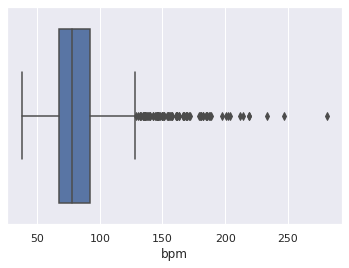

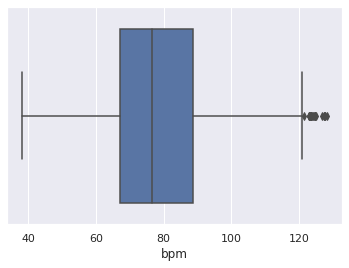

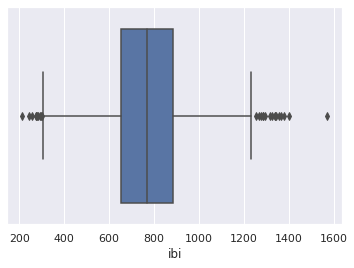

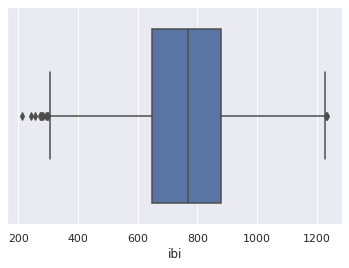

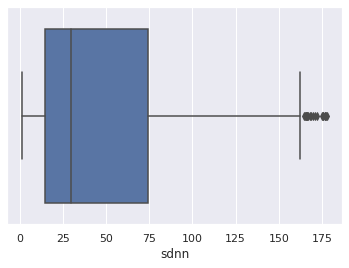

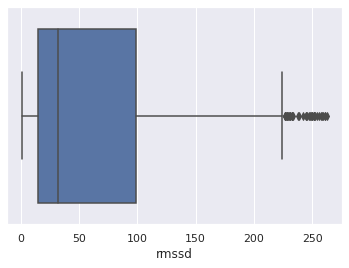

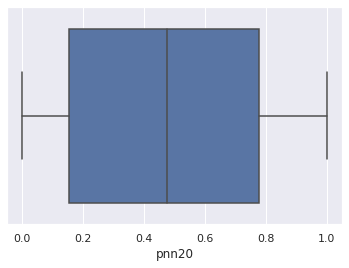

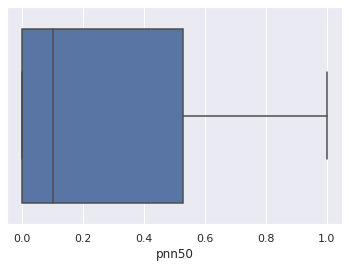

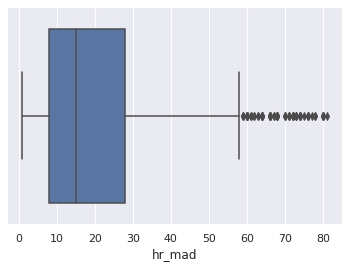

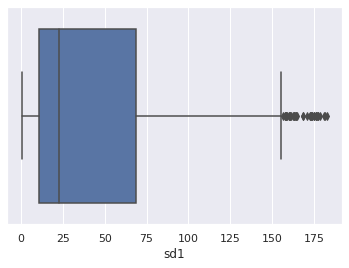

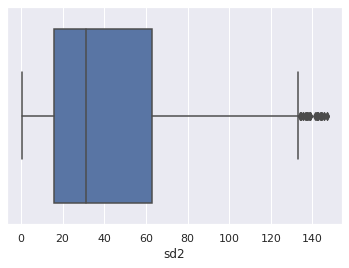

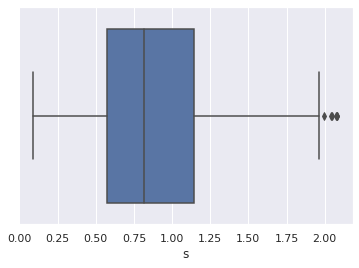

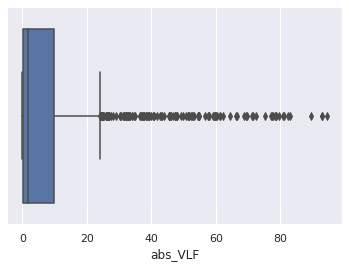

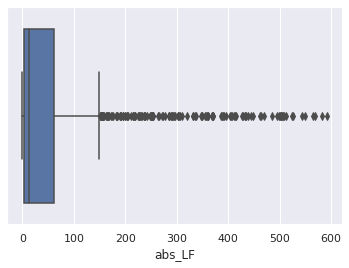

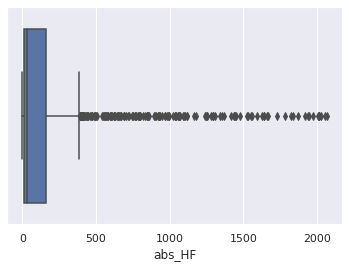

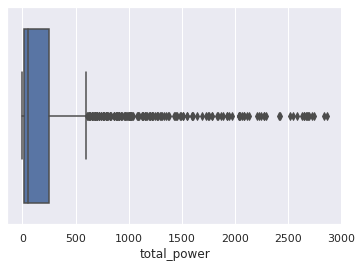

In [ ]:
def outlier_drop(eda,field_name):
   # finding the IQR
  percentile25 = field_name.quantile(0.25)
  percentile75 = field_name.quantile(0.75)
  # finding upper and lower limit
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  new_eda = eda[field_name < upper_limit]
  return new_eda

#removing outlier from median_house_value
sns.boxplot(eda['bpm'])
plt.show()
new_eda = outlier_drop(eda,eda['bpm'])
sns.boxplot(new_eda['bpm'])
plt.show()
sns.boxplot(eda['ibi'])
plt.show()
new_eda = outlier_drop(eda,eda['ibi'])
sns.boxplot(new_eda['ibi'])
plt.show()

new_eda = outlier_drop(eda,eda['sdnn'])
sns.boxplot(new_eda['sdnn'])
plt.show()
new_eda = outlier_drop(eda,eda['rmssd'])
sns.boxplot(new_eda['rmssd'])
plt.show()
new_eda = outlier_drop(eda,eda['pnn20'])
sns.boxplot(new_eda['pnn20'])
plt.show()
new_eda = outlier_drop(eda,eda['pnn50'])
sns.boxplot(new_eda['pnn50'])
plt.show()
new_eda = outlier_drop(eda,eda['hr_mad'])
sns.boxplot(new_eda['hr_mad'])
plt.show()
new_eda = outlier_drop(eda,eda['sd1'])
sns.boxplot(new_eda['sd1'])
plt.show()
new_eda = outlier_drop(eda,eda['sd2'])
sns.boxplot(new_eda['sd2'])
plt.show()
new_eda = outlier_drop(eda,eda['s'])
sns.boxplot(new_eda['s'])
plt.show()
new_eda = outlier_drop(eda,eda['abs_VLF'])
sns.boxplot(new_eda['abs_VLF'])
plt.show()
new_eda = outlier_drop(eda,eda['abs_LF'])
sns.boxplot(new_eda['abs_LF'])
plt.show()
new_eda = outlier_drop(eda,eda['abs_HF'])
sns.boxplot(new_eda['abs_HF'])
plt.show()
new_eda = outlier_drop(eda,eda['total_power'])
sns.boxplot(new_eda['total_power'])
plt.show()
eda = new_eda
  

In [ ]:
eda.describe()

,First_label,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,...,s,sd1/sd2,peak_VLF,peak_LF,peak_HF,abs_VLF,abs_LF,abs_HF,total_power,LFHFratio
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,...,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.00000,1109.000000,1109.000000,1109.000000,1109.000000
mean,4.743012,81.660239,780.418892,46.137462,35.991889,64.795819,0.441899,0.226208,28.142471,45.308478,...,1.169012,0.235428,0.037556,0.126781,0.266763,14.60835,66.311803,195.789378,276.709333,0.642272
std,2.609992,22.615126,179.786280,47.232964,42.291439,81.724466,0.331718,0.305821,35.943089,57.375737,...,2.622761,0.090179,0.009195,0.036051,0.100861,40.90125,143.458305,393.502320,515.359207,1.050094
min,1.000000,38.216561,242.764706,1.496663,0.800000,1.549193,0.000000,0.000000,1.000000,0.707107,...,0.173236,0.000000,0.000000,0.040000,0.150000,0.00000,0.000000,0.010000,0.010000,0.000000
25%,2.000000,67.179846,661.857143,13.622784,7.639821,14.220486,0.125000,0.000000,8.000000,9.776004,...,0.564929,0.173953,0.040000,0.110000,0.170000,0.33000,2.530000,7.560000,12.440000,0.180000
50%,5.000000,77.110911,778.100000,27.058570,15.594587,29.210669,0.428571,0.066667,15.000000,20.422694,...,0.809560,0.232234,0.040000,0.150000,0.240000,1.84000,12.920000,32.820000,54.040000,0.350000
75%,7.000000,90.654004,893.125000,64.665808,55.270808,84.697107,0.733333,0.400000,30.000000,57.129847,...,1.172508,0.305101,0.040000,0.150000,0.400000,10.24000,59.640000,159.360000,250.430000,0.700000
max,9.000000,247.152896,1570.000000,267.268901,209.621129,527.298397,1.000000,1.000000,242.000000,372.525677,...,49.224566,0.563103,0.040000,0.150000,0.400000,507.59000,1675.920000,2691.170000,2865.660000,17.260000


HeatMap

In [ ]:
'''#for finding relation between variables
plt.figure(figsize=(20,10))
c=eda.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c'''

'#for finding relation between variables\nplt.figure(figsize=(20,10))\nc=eda.corr()\nsns.heatmap(c,cmap="BrBG",annot=True)\nc'

Pearson Correlation Matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


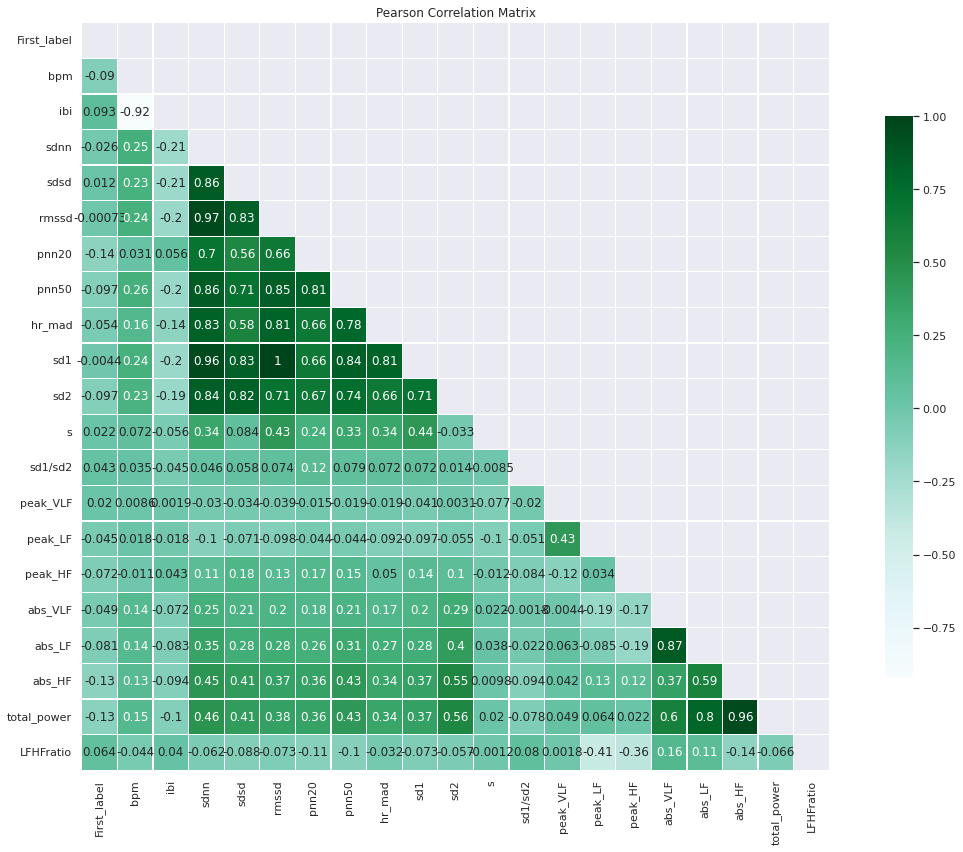

In [ ]:
#to define the performance of a classification algorithm
mask = np.zeros_like(eda.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax = plt.subplots(figsize=(16,12))
plt.title('Pearson Correlation Matrix')
sns.heatmap(eda.corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

#Count Plot of target variable

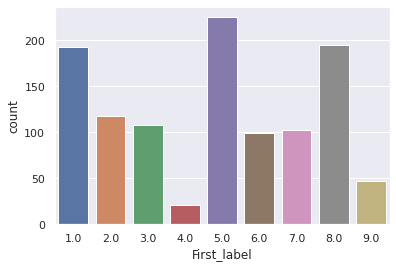

In [ ]:

# import thr necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib inline
  
# to ignore the warnings 
from warnings import filterwarnings
  
# set the background style of the plot
sns.countplot(eda['First_label'])

In [ ]:
#counting the number  of samples
y = eda['First_label']
print(y.head())
count1 = len(y[y==1])
print('Number of sample in class 1:',count1)
count2 = len(y[y==2])
print('Number of sample in class 2:',count2)
count3 = len(y[y==3])
print('Number of sample in class 3:',count3)

count4 = len(y[y==4])
print('number of sample in class 4:',count4)
count5 = len(y[y==5])
print('Number of sample in class 5:',count5)

count6 = len(y[y==6])        
print('Number of sample in class 6:',count6)
count7 = len(y[y==7])
print('number of sample in class 7:',count7)
count8 = len(y[y==8])
print('Number of sample in class 8:',count8)
count9 = len(y[y==9])
print('Number of sample in class 9:',count9)

0    8.0
1    3.0
3    8.0
4    1.0
5    2.0
Name: First_label, dtype: float64
Number of sample in class 1: 193
Number of sample in class 2: 118
Number of sample in class 3: 108
number of sample in class 4: 21
Number of sample in class 5: 225
Number of sample in class 6: 99
number of sample in class 7: 103
Number of sample in class 8: 195
Number of sample in class 9: 47


In [ ]:
eda = eda
eda.First_label
eda.drop(eda.loc[eda['First_label']==2].index, inplace=True)
eda.drop(eda.loc[eda['First_label']==3].index, inplace=True)
eda.drop(eda.loc[eda['First_label']==4].index, inplace=True)
eda.drop(eda.loc[eda['First_label']==6].index, inplace=True)
eda.drop(eda.loc[eda['First_label']==7].index, inplace=True)
eda.drop(eda.loc[eda['First_label']==9].index, inplace=True)
eda

,First_label,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,...,s,sd1/sd2,peak_VLF,peak_LF,peak_HF,abs_VLF,abs_LF,abs_HF,total_power,LFHFratio
0,8.0,68.254209,879.066667,21.389925,16.847455,37.179103,0.785714,0.214286,16.0,26.282609,...,1.783928,0.379190,0.04,0.15,0.19,0.27,1.08,2.99,4.34,0.36
3,8.0,71.326676,841.200000,12.410748,4.942527,8.569047,0.000000,0.000000,8.0,5.915217,...,0.361020,0.237756,0.04,0.13,0.15,1.08,6.66,9.28,17.02,0.72
4,1.0,77.255871,776.640000,29.305126,13.919411,23.958297,0.375000,0.041667,22.0,16.807736,...,0.451743,0.154512,0.04,0.11,0.30,0.98,17.82,88.68,107.49,0.20
6,1.0,97.108330,617.866667,21.645220,12.847616,18.792096,0.214286,0.000000,12.0,13.286482,...,0.464922,0.215796,0.04,0.15,0.21,2.69,14.27,40.51,57.47,0.35
12,5.0,115.433946,519.777778,67.114790,81.887255,96.813951,0.294118,0.294118,6.0,68.269464,...,1.126667,0.320650,0.04,0.15,0.22,6.96,254.52,1091.52,1353.00,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1.0,87.778528,683.538462,12.156767,5.467073,7.874008,0.000000,0.000000,10.0,5.238745,...,0.333935,0.337610,0.04,0.15,0.18,0.36,3.67,7.56,11.58,0.49
1372,8.0,77.372765,775.466667,18.980224,14.179606,24.284034,0.357143,0.071429,10.0,17.166650,...,0.829663,0.171939,0.04,0.15,0.40,0.31,4.32,9.84,14.47,0.44
1373,1.0,146.255850,410.240000,185.015736,86.429122,354.287313,0.958333,0.958333,24.0,250.192419,...,3.776625,0.195008,0.04,0.15,0.40,0.20,7.04,49.42,56.67,0.14
1379,5.0,68.093385,881.142857,102.749944,90.163559,125.026766,0.846154,0.461538,45.0,87.875517,...,0.752089,0.162127,0.04,0.15,0.34,45.85,205.85,1345.21,1596.91,0.15


#SVM

After Dropping

In [ ]:
X = pd.DataFrame(eda[['bpm','ibi','pnn20','s','sd1/sd2','hr_mad','peak_VLF','peak_LF','peak_HF','abs_VLF','LFHFratio','sdsd','pnn50','sd1','sd2','abs_LF','total_power']])
print(X.head(), '\n')
y = eda['First_label']
print(y.head())

           bpm         ibi     pnn20         s   sd1/sd2  hr_mad  peak_VLF  \
0    68.254209  879.066667  0.785714  1.783928  0.379190    16.0      0.04   
3    71.326676  841.200000  0.000000  0.361020  0.237756     8.0      0.04   
4    77.255871  776.640000  0.375000  0.451743  0.154512    22.0      0.04   
6    97.108330  617.866667  0.214286  0.464922  0.215796    12.0      0.04   
12  115.433946  519.777778  0.294118  1.126667  0.320650     6.0      0.04   

    peak_LF  peak_HF  abs_VLF  LFHFratio       sdsd     pnn50        sd1  \
0      0.15     0.19     0.27       0.36  16.847455  0.214286  26.282609   
3      0.13     0.15     1.08       0.72   4.942527  0.000000   5.915217   
4      0.11     0.30     0.98       0.20  13.919411  0.041667  16.807736   
6      0.15     0.21     2.69       0.35  12.847616  0.000000  13.286482   
12     0.15     0.22     6.96       0.23  81.887255  0.294118  68.269464   

          sd2  abs_LF  total_power  
0   14.732998    1.08         4.34  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(429, 17)
(184, 17)


In [ ]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant =5 )
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)    
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score)

In [ ]:
param_grid = {'C' : [0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel' :['rbf']}
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 3)
#model fitting
grid.fit(X_train,y_train)
#printing best parameter
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.360 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.372 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.372 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.372 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.365 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.360 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.372 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.372 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.372 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.365 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.360 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

#Decision Tree

After Dropping

In [ ]:
X = pd.DataFrame(eda[['bpm','ibi','pnn20','s','sd1/sd2','hr_mad','peak_VLF','peak_LF','peak_HF','abs_VLF','LFHFratio','sdsd','pnn50','sd1','sd2','abs_LF','total_power']])
print(X.head(), '\n')
y = eda['First_label']
print(y.head())

           bpm         ibi     pnn20         s   sd1/sd2  hr_mad  peak_VLF  \
0    68.254209  879.066667  0.785714  1.783928  0.379190    16.0      0.04   
3    71.326676  841.200000  0.000000  0.361020  0.237756     8.0      0.04   
4    77.255871  776.640000  0.375000  0.451743  0.154512    22.0      0.04   
6    97.108330  617.866667  0.214286  0.464922  0.215796    12.0      0.04   
12  115.433946  519.777778  0.294118  1.126667  0.320650     6.0      0.04   

    peak_LF  peak_HF  abs_VLF  LFHFratio       sdsd     pnn50        sd1  \
0      0.15     0.19     0.27       0.36  16.847455  0.214286  26.282609   
3      0.13     0.15     1.08       0.72   4.942527  0.000000   5.915217   
4      0.11     0.30     0.98       0.20  13.919411  0.041667  16.807736   
6      0.15     0.21     2.69       0.35  12.847616  0.000000  13.286482   
12     0.15     0.22     6.96       0.23  81.887255  0.294118  68.269464   

          sd2  abs_LF  total_power  
0   14.732998    1.08         4.34  


In [ ]:
#for maximum depth 3
names = ['bpm','ibi','pnn20','s','sd1/sd2','hr_mad','peak_VLF','peak_LF','peak_HF','abs_VLF','LFHFratio','sdsd','pnn50','sd1','sd2','abs_LF','total_power']
# Function to split the dataset
def splitdataset(balance_data):
  

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.3, random_state = 100)
      
    return X, y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.

def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 0,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 0,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = names
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[5. 5. 8. 1. 5. 1. 8. 8. 5. 8. 8. 8. 5. 5. 5. 5. 8. 8. 8. 8. 8. 8. 5. 8.
 5. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 5. 8. 8. 5. 8. 8. 5. 8. 8. 8. 5.
 8. 8. 8. 5. 8. 8. 1. 5. 5. 8. 5. 8. 1. 5. 8. 8. 8. 1. 8. 8. 8. 8. 8. 5.
 8. 5. 8. 8. 8. 5. 8. 5. 8. 5. 1. 1. 8. 8. 8. 8. 8. 5. 8. 8. 8. 8. 5. 5.
 1. 5. 8. 8. 5. 8. 8. 8. 5. 1. 8. 1. 8. 8. 5. 8. 5. 5. 8. 8. 5. 5. 8. 1.
 1. 8. 8. 1. 8. 8. 5. 8. 8. 5. 1. 5. 5. 5. 8. 8. 8. 8. 5. 8. 5. 8. 5. 1.
 5. 8. 5. 8. 8. 1. 8. 8. 5. 8. 5. 1. 8. 5. 8. 8. 8. 5. 1. 1. 8. 5. 8. 5.
 8. 5. 5. 8. 8. 1. 1. 5. 8. 1. 5. 1. 8. 8. 8. 8.]
Confusion Matrix:  [[10 19 35]
 [ 9 25 35]
 [ 4 11 36]]
Accuracy :  38.58695652173913
Report :                precision    recall  f1-score   support

         1.0       0.43      0.16      0.23        64
         5.0       0.45      0.36      0.40        69
         8.0       0.34      0.71      0.46        51

    accuracy                           0.39       184
   macro avg       0.41    

In [ ]:
#for maximum depth 4
names = ['bpm','ibi','pnn20','s','sd1/sd2','hr_mad','peak_VLF','peak_LF','peak_HF','abs_VLF','LFHFratio','sdsd','pnn50','sd1','sd2','abs_LF','total_power']
# Function to split the dataset
def splitdataset(balance_data):
  

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.3, random_state = 100)
      
    return X, y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.

def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 0,max_depth=4, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 0,
            max_depth = 4, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = names
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[5. 8. 5. 1. 5. 1. 8. 5. 5. 8. 8. 8. 5. 5. 5. 5. 8. 5. 5. 8. 8. 5. 5. 5.
 5. 5. 8. 8. 8. 8. 8. 8. 5. 8. 8. 8. 8. 5. 5. 8. 5. 8. 8. 5. 5. 8. 5. 5.
 8. 1. 8. 5. 5. 5. 1. 5. 5. 8. 5. 8. 1. 5. 8. 1. 8. 1. 5. 8. 8. 8. 5. 5.
 5. 5. 5. 5. 5. 8. 5. 5. 8. 5. 1. 1. 8. 8. 8. 5. 8. 5. 8. 5. 1. 8. 8. 5.
 1. 5. 8. 8. 5. 8. 5. 8. 5. 1. 1. 1. 5. 5. 5. 8. 5. 5. 8. 5. 5. 5. 8. 1.
 1. 8. 8. 1. 8. 8. 5. 1. 8. 5. 1. 5. 5. 5. 5. 5. 1. 8. 5. 8. 5. 8. 5. 1.
 5. 8. 5. 5. 5. 1. 8. 5. 5. 8. 5. 1. 8. 5. 5. 5. 8. 5. 1. 1. 8. 5. 5. 5.
 8. 5. 5. 5. 8. 1. 1. 5. 8. 1. 5. 1. 8. 5. 8. 8.]
Confusion Matrix:  [[14 31 19]
 [ 9 37 23]
 [ 6 20 25]]
Accuracy :  41.30434782608695
Report :                precision    recall  f1-score   support

         1.0       0.48      0.22      0.30        64
         5.0       0.42      0.54      0.47        69
         8.0       0.37      0.49      0.42        51

    accuracy                           0.41       184
   macro avg       0.43    

In [ ]:
 #for maximum depth 5
names = ['bpm','ibi','pnn20','s','sd1/sd2','hr_mad','peak_VLF','peak_LF','peak_HF','abs_VLF','LFHFratio','sdsd','pnn50','sd1','sd2','abs_LF','total_power']
# Function to split the dataset
def splitdataset(balance_data):
  

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.3, random_state = 100)
      
    return X, y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.

def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 0,max_depth=5, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 0,
            max_depth = 5, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = names
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[5. 8. 8. 8. 5. 1. 1. 5. 5. 8. 8. 1. 5. 5. 5. 5. 8. 5. 5. 1. 8. 5. 5. 5.
 5. 5. 8. 8. 8. 8. 8. 8. 5. 8. 1. 1. 8. 5. 8. 8. 5. 1. 8. 5. 5. 8. 5. 5.
 8. 1. 8. 5. 5. 5. 1. 5. 5. 8. 5. 8. 1. 5. 1. 1. 8. 1. 5. 8. 8. 8. 5. 5.
 5. 5. 5. 8. 5. 8. 5. 5. 8. 5. 1. 1. 8. 8. 1. 5. 1. 5. 1. 5. 1. 8. 8. 5.
 8. 5. 8. 8. 5. 8. 5. 1. 5. 1. 1. 1. 5. 5. 5. 8. 5. 5. 8. 5. 5. 5. 8. 1.
 1. 8. 8. 8. 1. 8. 5. 1. 8. 5. 8. 5. 5. 5. 5. 5. 1. 8. 5. 8. 5. 8. 5. 1.
 5. 8. 5. 5. 5. 8. 8. 8. 5. 1. 5. 8. 1. 5. 5. 5. 8. 5. 1. 1. 1. 5. 5. 5.
 1. 5. 5. 5. 1. 1. 1. 5. 8. 8. 5. 1. 8. 5. 8. 1.]
Confusion Matrix:  [[15 31 18]
 [12 35 22]
 [13 18 20]]
Accuracy :  38.04347826086957
Report :                precision    recall  f1-score   support

         1.0       0.38      0.23      0.29        64
         5.0       0.42      0.51      0.46        69
         8.0       0.33      0.39      0.36        51

    accuracy                           0.38       184
   macro avg       0.38    

#ANN

In [ ]:
X = pd.DataFrame(eda[['bpm','ibi','pnn20','s','sd1/sd2','hr_mad','peak_VLF','peak_LF','peak_HF','abs_VLF','LFHFratio','sdsd','pnn50','sd1','sd2','abs_LF','total_power']])
print(X.head(), '\n')
print(X.head(), '\n')
y = eda['First_label']
print(y.head())
print(y.shape)
from sklearn.preprocessing import OneHotEncoder

           bpm         ibi     pnn20         s   sd1/sd2  hr_mad  peak_VLF  \
0    68.254209  879.066667  0.785714  1.783928  0.379190    16.0      0.04   
3    71.326676  841.200000  0.000000  0.361020  0.237756     8.0      0.04   
4    77.255871  776.640000  0.375000  0.451743  0.154512    22.0      0.04   
6    97.108330  617.866667  0.214286  0.464922  0.215796    12.0      0.04   
12  115.433946  519.777778  0.294118  1.126667  0.320650     6.0      0.04   

    peak_LF  peak_HF  abs_VLF  LFHFratio       sdsd     pnn50        sd1  \
0      0.15     0.19     0.27       0.36  16.847455  0.214286  26.282609   
3      0.13     0.15     1.08       0.72   4.942527  0.000000   5.915217   
4      0.11     0.30     0.98       0.20  13.919411  0.041667  16.807736   
6      0.15     0.21     2.69       0.35  12.847616  0.000000  13.286482   
12     0.15     0.22     6.96       0.23  81.887255  0.294118  68.269464   

          sd2  abs_LF  total_power  
0   14.732998    1.08         4.34  


In [ ]:
#Machine learning algorithms cannot work with categorical data directly.hence they have to be converted to binary numbers
#One-hot encoding the three classes
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_Y = encoder.fit(y.values.reshape(-1,1))
encoded_Y = encoded_Y.fit_transform(y.values.reshape(-1,1)).toarray()

encoded_Y


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size = 0.3, random_state = 0)
print(y_train.shape)
print(y_test.shape)
y_train
print(y_test)

(429, 3)
(184, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.

First model ann 

In [ ]:
def build_model():
  # define the keras model
  model = Sequential() # intialize the ANN
  model.add(Dense(12, input_dim=17, activation='relu')) #Relu or Rectified Linear Activation Function is the most common choice of activation function in the world of deep learning
  model.add(Dense(11, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(9, activation='relu'))

  model.add(Dense(3, activation='softmax')) #Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector

  model.summary()

  return model

In [ ]:
model_ann = build_model()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 12)                216       
                                                                 
 dense_33 (Dense)            (None, 11)                143       
                                                                 
 dense_34 (Dense)            (None, 10)                120       
                                                                 
 dense_35 (Dense)            (None, 9)                 99        
                                                                 
 dense_36 (Dense)            (None, 3)                 30        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ann.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

In [ ]:
from tensorflow.keras.utils import plot_model

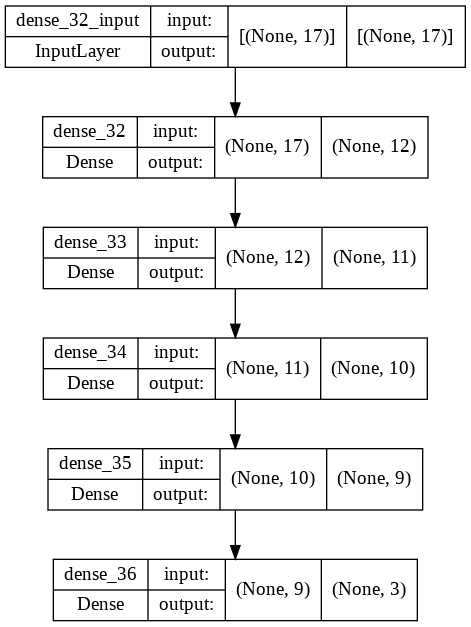

In [ ]:
plot_model(model_ann, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping
#EarlyStopping() is used to callback early stopping to avoid overfitting.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#The “monitor” allows you to specify the performance measure to monitor in order to end training,‘val_loss‘ for the loss on the validation dataset.
#the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).
#To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.
#model may coast into a plateau of no improvement or even get slightly worse before getting much better.We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument.

In [ ]:
# fit the keras model on the dataset
history = model_ann.fit(X_train,y_train, epochs=150, 
                    batch_size=10, validation_split=0.1, callbacks=[es])
h, accuracy = model_ann.evaluate(X_test, y_test)
print(h)

Epoch 1/150
 1/39 [..............................] - ETA: 2s - loss: 35.0789 - acc: 0.2000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


38/39 [============================>.] - ETA: 0s - loss: 6.5618 - acc: 0.3316

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


39/39 [==============================] - 2s 50ms/step - loss: 6.4955 - acc: 0.3316 - val_loss: 4.7574 - val_acc: 0.2558
Epoch 2/150
39/39 [==============================] - 2s 42ms/step - loss: 2.0639 - acc: 0.3575 - val_loss: 3.3963 - val_acc: 0.2093
Epoch 3/150
39/39 [==============================] - 2s 40ms/step - loss: 1.7052 - acc: 0.3601 - val_loss: 2.6591 - val_acc: 0.1628
Epoch 4/150
39/39 [==============================] - 2s 54ms/step - loss: 1.5291 - acc: 0.3627 - val_loss: 2.3596 - val_acc: 0.3488
Epoch 5/150
39/39 [==============================] - 2s 46ms/step - loss: 1.4055 - acc: 0.3523 - val_loss: 2.1663 - val_acc: 0.1860
Epoch 6/150
39/39 [==============================] - 2s 43ms/step - loss: 1.3194 - acc: 0.3964 - val_loss: 1.9275 - val_acc: 0.3023
Epoch 7/150
39/39 [==============================] - 2s 42ms/step - loss: 1.4527 - acc: 0.3834 - val_loss: 2.0617 - val_acc: 0.3953
Epoch 8/150
39/39 [==============================] - 2s 54ms/step - loss: 1.3578 - acc: 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 34.78


Second model ann 

In [ ]:
def build_model():
  # define the keras model
  model = Sequential() # intialize the ANN
  model.add(Dense(12, input_dim=17, activation='relu')) #Relu or Rectified Linear Activation Function is the most common choice of activation function in the world of deep learning
  model.add(Dense(10, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(7, activation='relu'))

  model.add(Dense(3, activation='softmax')) #Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector

  model.summary()

  return model

In [ ]:
model_ann = build_model()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 12)                216       
                                                                 
 dense_38 (Dense)            (None, 10)                130       
                                                                 
 dense_39 (Dense)            (None, 8)                 88        
                                                                 
 dense_40 (Dense)            (None, 7)                 63        
                                                                 
 dense_41 (Dense)            (None, 3)                 24        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ann.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

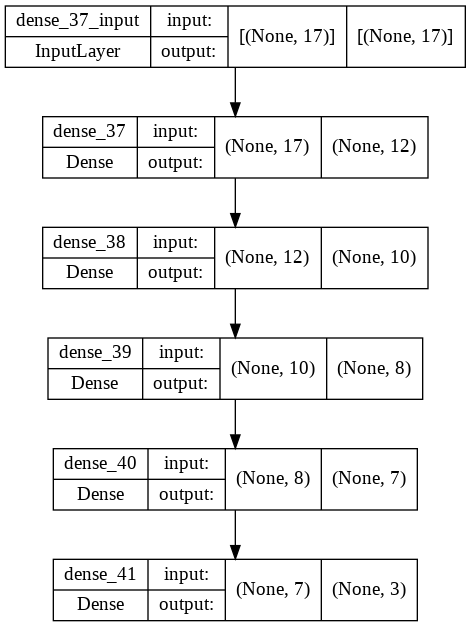

In [ ]:
plot_model(model_ann, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping
#EarlyStopping() is used to callback early stopping to avoid overfitting.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#The “monitor” allows you to specify the performance measure to monitor in order to end training,‘val_loss‘ for the loss on the validation dataset.
#the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).
#To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.
#model may coast into a plateau of no improvement or even get slightly worse before getting much better.We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument.

In [ ]:
# fit the keras model on the dataset
history = model_ann.fit(X_train,y_train, epochs=150, 
                    batch_size=10, validation_split=0.1, callbacks=[es])
h, accuracy = model_ann.evaluate(X_test, y_test)
print(h)

Epoch 1/150
 4/39 [==>...........................] - ETA: 0s - loss: 85.4951 - acc: 0.4250 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


39/39 [==============================] - 1s 25ms/step - loss: 57.7581 - acc: 0.3290 - val_loss: 34.8949 - val_acc: 0.2791
Epoch 2/150
 4/39 [==>...........................] - ETA: 0s - loss: 31.0455 - acc: 0.2500

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


39/39 [==============================] - 1s 22ms/step - loss: 17.7222 - acc: 0.2902 - val_loss: 14.6751 - val_acc: 0.3721
Epoch 3/150
39/39 [==============================] - 1s 21ms/step - loss: 7.2885 - acc: 0.3212 - val_loss: 5.4602 - val_acc: 0.3488
Epoch 4/150
39/39 [==============================] - 1s 21ms/step - loss: 2.7827 - acc: 0.3161 - val_loss: 2.6692 - val_acc: 0.2791
Epoch 5/150
39/39 [==============================] - 1s 21ms/step - loss: 2.0292 - acc: 0.3290 - val_loss: 2.1793 - val_acc: 0.3023
Epoch 6/150
39/39 [==============================] - 1s 21ms/step - loss: 1.7368 - acc: 0.3446 - val_loss: 1.7549 - val_acc: 0.3256
Epoch 7/150
39/39 [==============================] - 1s 21ms/step - loss: 1.5189 - acc: 0.3497 - val_loss: 1.5200 - val_acc: 0.3488
Epoch 8/150
39/39 [==============================] - 1s 21ms/step - loss: 1.3954 - acc: 0.3497 - val_loss: 1.2973 - val_acc: 0.3488
Epoch 9/150
39/39 [==============================] - 1s 21ms/step - loss: 1.3023 - acc

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 32.07


Third model ann 

In [ ]:
def build_model():
  # define the keras model
  model = Sequential() # intialize the ANN
  model.add(Dense(12, input_dim=17, activation='relu')) #Relu or Rectified Linear Activation Function is the most common choice of activation function in the world of deep learning
  model.add(Dense(9, activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(5, activation='relu'))

  model.add(Dense(3, activation='softmax')) #Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector

  model.summary()

  return model

In [ ]:
model_ann = build_model()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 12)                216       
                                                                 
 dense_43 (Dense)            (None, 9)                 117       
                                                                 
 dense_44 (Dense)            (None, 6)                 60        
                                                                 
 dense_45 (Dense)            (None, 5)                 35        
                                                                 
 dense_46 (Dense)            (None, 3)                 18        
                                                                 
Total params: 446
Trainable params: 446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ann.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

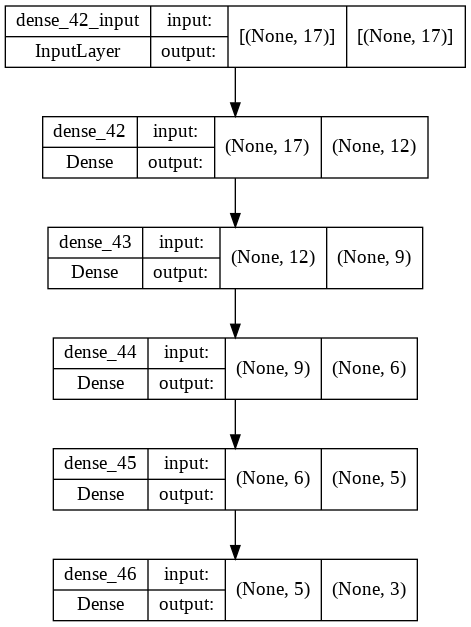

In [ ]:
plot_model(model_ann, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping
#EarlyStopping() is used to callback early stopping to avoid overfitting.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#The “monitor” allows you to specify the performance measure to monitor in order to end training,‘val_loss‘ for the loss on the validation dataset.
#the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).
#To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.
#model may coast into a plateau of no improvement or even get slightly worse before getting much better.We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the “patience” argument.

In [ ]:
# fit the keras model on the dataset
history = model_ann.fit(X_train,y_train, epochs=150, 
                    batch_size=10, validation_split=0.1, callbacks=[es])
h, accuracy = model_ann.evaluate(X_test, y_test)
print(h)

Epoch 1/150
 4/39 [==>...........................] - ETA: 0s - loss: 8.0922 - acc: 0.3750

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


39/39 [==============================] - 1s 23ms/step - loss: 4.3688 - acc: 0.3368 - val_loss: 1.7465 - val_acc: 0.3488
Epoch 2/150
 4/39 [==>...........................] - ETA: 0s - loss: 2.5508 - acc: 0.3500

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


39/39 [==============================] - 1s 22ms/step - loss: 2.0254 - acc: 0.3627 - val_loss: 1.3208 - val_acc: 0.2558
Epoch 3/150
39/39 [==============================] - 1s 22ms/step - loss: 1.6191 - acc: 0.2979 - val_loss: 1.3308 - val_acc: 0.2326
Epoch 4/150
39/39 [==============================] - 1s 21ms/step - loss: 1.4087 - acc: 0.3083 - val_loss: 1.2700 - val_acc: 0.3488
Epoch 5/150
39/39 [==============================] - 1s 21ms/step - loss: 1.2884 - acc: 0.3264 - val_loss: 1.2231 - val_acc: 0.3721
Epoch 6/150
39/39 [==============================] - 1s 21ms/step - loss: 1.2349 - acc: 0.2979 - val_loss: 1.2024 - val_acc: 0.2558
Epoch 7/150
39/39 [==============================] - 1s 22ms/step - loss: 1.2279 - acc: 0.3679 - val_loss: 1.1512 - val_acc: 0.3023
Epoch 8/150
39/39 [==============================] - 1s 21ms/step - loss: 1.1746 - acc: 0.3472 - val_loss: 1.1370 - val_acc: 0.2791
Epoch 9/150
39/39 [==============================] - 1s 21ms/step - loss: 1.1549 - acc: 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 34.78


#XG_BOOST 

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
X = pd.DataFrame(eda[['bpm','ibi','sdnn','rmssd','pnn20','s','sd1/sd2','hr_mad','peak_VLF','peak_LF','peak_HF','abs_VLF','LFHFratio','sdsd','pnn50','sd1','sd2','abs_LF','total_power','abs_HF']])
print(X.head(), '\n')
print(X.head(), '\n')
y = eda['First_label']
print(y.head())
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state=0)
model = XGBClassifier()
model=model.fit(X_train,y_train)
predictions = model.predict(X_test) 
print("Train Accuracy:", accuracy_score(y_train,model.predict(X_train).round()))
print("Test Accuracy:", accuracy_score(y_test, predictions.round()))
print("Confusion Matrix:", confusion_matrix(y_test, predictions.round()))
print (classification_report(y_test,predictions.round()))

           bpm         ibi       sdnn      rmssd     pnn20         s  \
0    68.254209  879.066667  21.389925  37.179103  0.785714  1.783928   
3    71.326676  841.200000  12.410748   8.569047  0.000000  0.361020   
4    77.255871  776.640000  29.305126  23.958297  0.375000  0.451743   
6    97.108330  617.866667  21.645220  18.792096  0.214286  0.464922   
12  115.433946  519.777778  67.114790  96.813951  0.294118  1.126667   

     sd1/sd2  hr_mad  peak_VLF  peak_LF  peak_HF  abs_VLF  LFHFratio  \
0   0.379190    16.0      0.04     0.15     0.19     0.27       0.36   
3   0.237756     8.0      0.04     0.13     0.15     1.08       0.72   
4   0.154512    22.0      0.04     0.11     0.30     0.98       0.20   
6   0.215796    12.0      0.04     0.15     0.21     2.69       0.35   
12  0.320650     6.0      0.04     0.15     0.22     6.96       0.23   

         sdsd     pnn50        sd1        sd2  abs_LF  total_power   abs_HF  
0   16.847455  0.214286  26.282609  14.732998    1.08   

#CNN

   Unnamed: 0   index Recording  First_label         0         1         2  \
0           0  1002.0     A1003          5.0  0.088999  0.090999  0.091999   
1           1   997.0     A0998          1.0 -0.092522 -0.132455 -0.110897   
2           2   992.0     A0993          2.0 -0.209534 -0.295894 -0.274526   
3           3   993.0     A0994          2.0  0.036721  0.042721  0.046721   
4           4  1006.0     A1007          2.0 -0.062273 -0.058273 -0.055273   

          3         4         5  ...  65990  65991  65992  65993  65994  \
0  0.093999  0.094999  0.095999  ...    NaN    NaN    NaN    NaN    NaN   
1 -0.114463 -0.112943 -0.121264  ...    NaN    NaN    NaN    NaN    NaN   
2 -0.303386 -0.298058 -0.296888  ...    NaN    NaN    NaN    NaN    NaN   
3  0.049721  0.048721  0.044721  ...    NaN    NaN    NaN    NaN    NaN   
4 -0.050273 -0.045273 -0.041273  ...    NaN    NaN    NaN    NaN    NaN   

   65995  65996  65997  65998  65999  
0    NaN    NaN    NaN    NaN    NaN  
1 

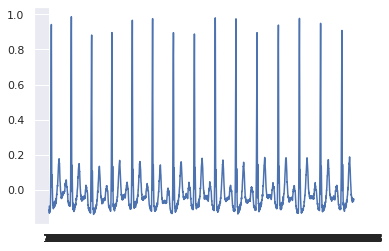

In [ ]:

# file location
df =  pd.read_csv('/content/drive/MyDrive/ECG-2-Lead DSS/Dataset/ecg_dataset.csv')
print(df.head())
df= df.drop(['Unnamed: 0','index','Recording'],axis =1) #dropping irrelevant columns
df.head(15)
plt.plot(df.iloc[1,1:])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Columns: 66001 entries, First_label to 65999
dtypes: float64(66001)
memory usage: 1003.6 MB


In [ ]:
#locating X 
df2=df.iloc[: , 0:5000].dropna()
X  = df2.iloc[: , 1:5000]
print(X)

             0         1         2         3         4         5         6  \
0     0.088999  0.090999  0.091999  0.093999  0.094999  0.095999  0.093999   
1    -0.092522 -0.132455 -0.110897 -0.114463 -0.112943 -0.121264 -0.121838   
2    -0.209534 -0.295894 -0.274526 -0.303386 -0.298058 -0.296888 -0.282371   
3     0.036721  0.042721  0.046721  0.049721  0.048721  0.044721  0.040721   
4    -0.062273 -0.058273 -0.055273 -0.050273 -0.045273 -0.041273 -0.037273   
...        ...       ...       ...       ...       ...       ...       ...   
1988 -0.055594 -0.054594 -0.053594 -0.052594 -0.050594 -0.049594 -0.047594   
1989  0.004023  0.016836  0.032637  0.042120  0.037027  0.040665  0.052432   
1990 -0.035629 -0.052616 -0.047407 -0.050871 -0.051685 -0.056790 -0.056526   
1991 -0.018592 -0.026407 -0.024327 -0.030069 -0.027320 -0.024150 -0.027911   
1992 -0.030501 -0.029501 -0.030501 -0.031501 -0.031501 -0.031501 -0.033501   

             7         8         9  ...      4989      4990    

In [ ]:
print(X.shape)

(1990, 4999)


In [ ]:
y= df2.loc[:,"First_label"]
print(y)

0       5.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1988    5.0
1989    8.0
1990    6.0
1991    3.0
1992    6.0
Name: First_label, Length: 1990, dtype: float64


Count Plot of target variable

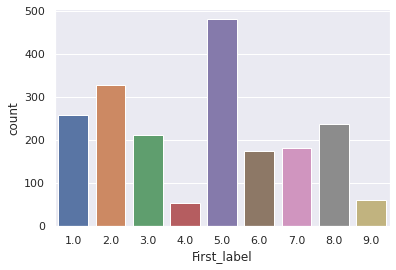

In [ ]:

# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib inline
  
# to ignore the warnings 
from warnings import filterwarnings
  
# set the background style of the plot
sns.countplot(df2['First_label'])

In [ ]:
#counting the number  of samples
y = df2['First_label']
print(y.head())
count1 = len(y[y==1])
print('Number of sample in class 1:',count1)
count2 = len(y[y==2])
print('Number of sample in class 2:',count2)
count3 = len(y[y==3])
print('Number of sample in class 3:',count3)

count4 = len(y[y==4])
print('number of sample in class 4:',count4)
count5 = len(y[y==5])
print('Number of sample in class 5:',count5)

count6 = len(y[y==6])        
print('Number of sample in class 6:',count6)
count7 = len(y[y==7])
print('number of sample in class 7:',count7)
count8 = len(y[y==8])
print('Number of sample in class 8:',count8)
count9 = len(y[y==9])
print('Number of sample in class 9:',count9)

0    5.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: First_label, dtype: float64
Number of sample in class 1: 258
Number of sample in class 2: 328
Number of sample in class 3: 213
number of sample in class 4: 55
Number of sample in class 5: 481
Number of sample in class 6: 175
number of sample in class 7: 181
Number of sample in class 8: 238
Number of sample in class 9: 61


In [ ]:
df = df2
df.First_label
df.drop(df.loc[df['First_label']==4].index, inplace=True)
df.drop(df.loc[df['First_label']==6].index, inplace=True)
df.drop(df.loc[df['First_label']==7].index, inplace=True)
df.drop(df.loc[df['First_label']==9].index, inplace=True)
df

,First_label,0,1,2,3,4,5,6,7,8,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
0,5.0,0.088999,0.090999,0.091999,0.093999,0.094999,0.095999,0.093999,0.091999,0.090999,...,-0.059001,-0.049001,-0.044001,-0.040001,-0.042001,-0.047001,-0.056001,-0.061001,-0.063001,-0.062001
1,1.0,-0.092522,-0.132455,-0.110897,-0.114463,-0.112943,-0.121264,-0.121838,-0.122937,-0.119949,...,-0.062682,-0.056636,-0.052216,-0.059480,-0.059062,-0.061680,-0.065324,-0.061348,-0.057848,-0.050461
2,2.0,-0.209534,-0.295894,-0.274526,-0.303386,-0.298058,-0.296888,-0.282371,-0.277209,-0.270929,...,-0.153223,-0.145299,-0.137828,-0.134801,-0.144477,-0.161621,-0.184788,-0.170002,-0.157330,-0.166659
3,2.0,0.036721,0.042721,0.046721,0.049721,0.048721,0.044721,0.040721,0.039721,0.040721,...,-0.194279,-0.193279,-0.197279,-0.200279,-0.202279,-0.201279,-0.194279,-0.186279,-0.180279,-0.178279
4,2.0,-0.062273,-0.058273,-0.055273,-0.050273,-0.045273,-0.041273,-0.037273,-0.036273,-0.033273,...,0.025727,0.027727,0.029727,0.028727,0.026727,0.027727,0.025727,0.025727,0.023727,0.021727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1.0,-0.026258,-0.052828,-0.030850,-0.011464,-0.004187,0.000294,-0.015694,-0.058695,-0.072755,...,0.226909,0.234099,0.233059,0.238621,0.267447,0.232037,0.220976,0.214545,0.163179,0.140629
1987,3.0,-0.004924,-0.008424,-0.008049,-0.008382,-0.022751,-0.033532,-0.035375,-0.038267,-0.020132,...,-0.017140,-0.010712,0.000010,-0.016909,-0.030680,-0.026210,-0.020695,-0.002540,-0.013737,-0.035748
1988,5.0,-0.055594,-0.054594,-0.053594,-0.052594,-0.050594,-0.049594,-0.047594,-0.047594,-0.048594,...,-0.031594,-0.029594,-0.025594,-0.022594,-0.020594,-0.014594,-0.011594,-0.007594,-0.003594,0.000406
1989,8.0,0.004023,0.016836,0.032637,0.042120,0.037027,0.040665,0.052432,0.062265,0.065130,...,-0.116163,-0.113792,-0.113709,-0.109059,-0.111308,-0.115739,-0.111913,-0.111365,-0.111498,-0.111381


In [ ]:
y= df.loc[:,"First_label"]
print(y.shape)

(1518,)


In [ ]:
print(unique(y))

[1. 2. 3. 5. 8.]


In [ ]:
X = df.iloc[:, 1:]
X= X.values.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

(1518, 4999, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder #Encode categorical features as a one-hot numeric array.
encoder = OneHotEncoder()

encoded_Y = encoder.fit(y.values.reshape(-1,1))
encoded_Y = encoded_Y.fit_transform(y.values.reshape(-1,1)).toarray()

encoded_Y


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [ ]:
print(encoded_Y.shape)

(1518, 5)


In [ ]:
len(X) == len(encoded_Y)

True

In [ ]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X, encoded_Y, test_size=0.2)

First model

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
#CNN
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
model = Sequential()
model.add(Conv1D(8, 2, activation="relu", input_shape=(4999,1)))
model.add(Dense(4, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(5, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4998, 8)           24        
                                                                 
 dense_47 (Dense)            (None, 4998, 4)           36        
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2499, 4)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9996)              0         
                                                                 
 dense_48 (Dense)            (None, 5)                 49985     
                                                                 
Total params: 50,045
Trainable params: 50,045
Non-trainable params: 0
_________________________________________________

In [ ]:
model.fit(Xtrain, ytrain, epochs=100, batch_size=10, validation_split=0.2)
acc = model.evaluate(Xtrain, ytrain)
print("Loss:", acc[0], " Accuracy:", acc[1])

Epoch 1/100
 2/98 [..............................] - ETA: 5s - loss: 1.5866 - accuracy: 0.3000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


98/98 [==============================] - 5s 47ms/step - loss: 1.5773 - accuracy: 0.3378 - val_loss: 1.6243 - val_accuracy: 0.2716
Epoch 2/100
98/98 [==============================] - 5s 46ms/step - loss: 1.4488 - accuracy: 0.3728 - val_loss: 1.6582 - val_accuracy: 0.2593
Epoch 3/100
98/98 [==============================] - 5s 49ms/step - loss: 1.2686 - accuracy: 0.4892 - val_loss: 1.9387 - val_accuracy: 0.2716
Epoch 4/100
98/98 [==============================] - 4s 45ms/step - loss: 1.0274 - accuracy: 0.6303 - val_loss: 2.2289 - val_accuracy: 0.2675
Epoch 5/100
98/98 [==============================] - 5s 48ms/step - loss: 0.8345 - accuracy: 0.7127 - val_loss: 2.5919 - val_accuracy: 0.2510
Epoch 6/100
98/98 [==============================] - 5s 48ms/step - loss: 0.6405 - accuracy: 0.7889 - val_loss: 3.0071 - val_accuracy: 0.2551
Epoch 7/100
98/98 [==============================] - 4s 46ms/step - loss: 0.4952 - accuracy: 0.8311 - val_loss: 3.6680 - val_accuracy: 0.2716
Epoch 8/100
98/98 

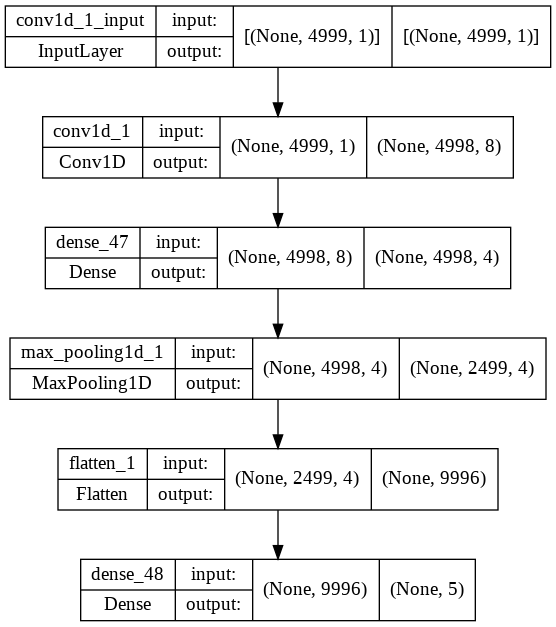

In [ ]:
plot_model(model, to_file='model_plotcnn.png', show_shapes=True, show_layer_names=True)

In [ ]:
predictions = model.predict(Xtest) 
print("Train Accuracy:", accuracy_score(ytrain,model.predict(Xtrain).round()))
print("Test Accuracy:", accuracy_score(ytest, predictions.round()))
print (classification_report(ytest,predictions.round()))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Train Accuracy: 0.8533772652388797
Test Accuracy: 0.2730263157894737
              precision    recall  f1-score   support

           0       0.38      0.23      0.29        69
           1       0.20      0.13      0.16        76
           2       0.14      0.17      0.15        35
           3       0.39      0.56      0.46        84
           4       0.11      0.10      0.10        40

   micro avg       0.28      0.27      0.28       304
   macro avg       0.24      0.24      0.23       304
weighted avg       0.27      0.27      0.26       304
 samples avg       0.27      0.27      0.27       304



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
